In [1]:
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from mtdnetwork.statistic.utils import decorate, savefig
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')

from run import multiple_mtd_simulation

current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')


multiple_results = []
multiple_results_avg = []
multiple_results_mttc = []
multiple_results_mttc_avg = []

In [2]:
for i in range(20):
    evaluations, mttc_10_timestamp = multiple_mtd_simulation()
    multiple_results.append(evaluations)
    multiple_results_mttc.append(mttc_10_timestamp)

Finished simulation for random!
Finished simulation for alternative!
Finished simulation for simultaneous!
Finished simulation for random!
Finished simulation for alternative!
Finished simulation for simultaneous!
Finished simulation for random!
Finished simulation for alternative!
Finished simulation for simultaneous!
Finished simulation for random!
Finished simulation for alternative!
Finished simulation for simultaneous!
Finished simulation for random!
Finished simulation for alternative!
Finished simulation for simultaneous!
Finished simulation for random!
Finished simulation for alternative!
Finished simulation for simultaneous!
Finished simulation for random!
Finished simulation for alternative!
Finished simulation for simultaneous!
Finished simulation for random!
Finished simulation for alternative!
Finished simulation for simultaneous!
Finished simulation for random!
Finished simulation for alternative!
Finished simulation for simultaneous!
Finished simulation for random!
Finis

In [3]:
for i in range(len(multiple_results_mttc[0])):
    multiple_results_mttc_avg.append({
        'Name': multiple_results_mttc[0][i]['Name'],
        'Time': multiple_results_mttc[0][i]['Time'],
        'MTD Interval': multiple_results_mttc[0][i]['MTD Interval'],
        'Mean Time to Compromise': sum([r[i]['Mean Time to Compromise'] for r in multiple_results_mttc]) / len(multiple_results_mttc),
    })
pd.DataFrame(multiple_results_mttc_avg).to_csv('experimental_data/multiple_mtd_sim_mttc.csv', index=False)

In [4]:
for i in range(len(multiple_results[0])):
    multiple_results_avg.append({
        'Name': multiple_results[0][i]['Name'],
        'MTD Interval': multiple_results[0][i]['MTD Interval'],
        'Mean Time to Compromise': sum([r[i]['MTTC'] for r in multiple_results]) / len(multiple_results),
        'MTD Execution Frequency': sum([r[i]['MEF'] for r in multiple_results]) / len(multiple_results),
        'Attack Success Rate': sum([r[i]['ASR'] for r in multiple_results]) / len(multiple_results),
        'Compromised Num': sum([r[i]['Compromised Num'] for r in multiple_results]) / len(multiple_results)
    })

pd.DataFrame(multiple_results_avg).to_csv('experimental_data/multiple_mtd_sim.csv', index=False)

In [11]:
single_results_avg = pd.read_csv("experimental_data/single_mtd_sim.csv")
single_results_mttc_avg = pd.read_csv("experimental_data/single_mtd_sim_mttc.csv")
multiple_results_avg = pd.read_csv("experimental_data/multiple_mtd_sim.csv")
multiple_results_mttc_avg = pd.read_csv("experimental_data/multiple_mtd_sim_mttc.csv")

if len(multiple_results_avg[multiple_results_avg['Name'] == 'NoMTD']) == 0:
    multiple_results_avg = multiple_results_avg.append(single_results_avg[single_results_avg['Name'] == 'NoMTD'])
    multiple_results_mttc_avg = multiple_results_mttc_avg.append(single_results_mttc_avg[single_results_mttc_avg['Name'] == 'NoMTD'])

## The trend of Mean Time to Compromise with MTD Triggering Interval = 100s in 10000s simulation time

Saving figure to file experimental_data/multiple_mtd_sim_mttc.jpg


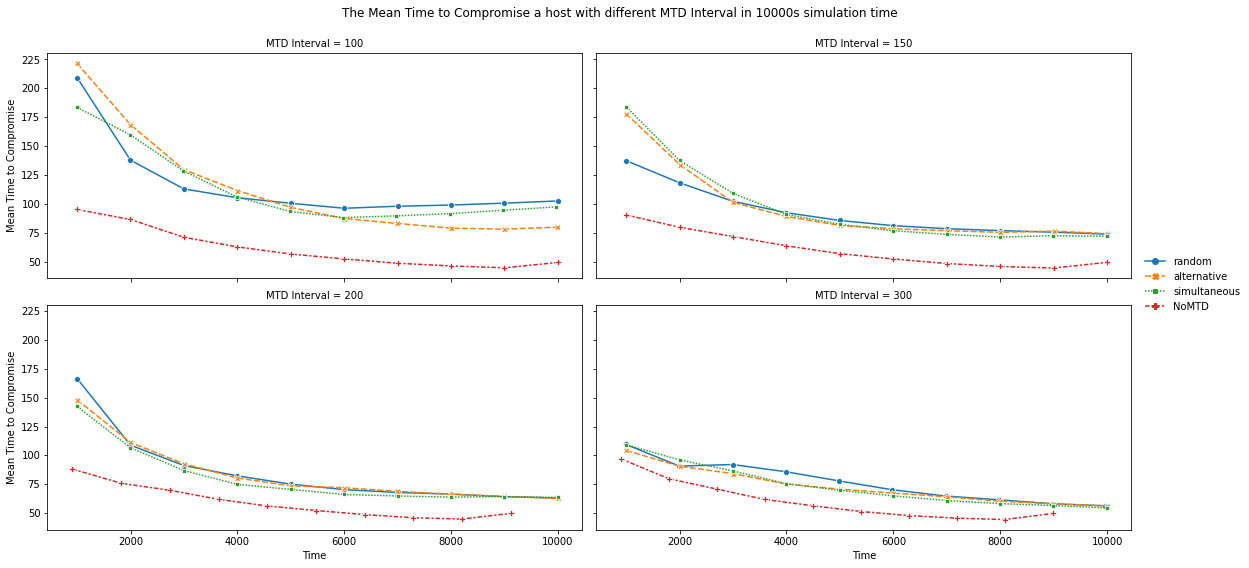

In [19]:
# multiple_results_mttc_avg = multiple_results_mttc_avg[multiple_results_mttc_avg['MTD Interval'] == 100]
g = sns.FacetGrid(multiple_results_mttc_avg, col="MTD Interval",  col_wrap=2, margin_titles=True, despine=False, height=4, aspect= 2)
g.map_dataframe(sns.lineplot, x="Time", y="Mean Time to Compromise", style='Name', hue='Name',  markers=True)
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('The Mean Time to Compromise a host with different MTD Interval in 10000s simulation time')
savefig('experimental_data/multiple_mtd_sim_mttc.jpg')
plt.show()
# sns.lineplot(data=multiple_results_mttc_avg, x='Time', y='Mean Time to Compromise', hue='Name', style='Name', markers=True, dashes=False)


## The number of hosts being compromised at 10000s simulation time with 4 different MTD triggering interval

Saving figure to file experimental_data/multiple_mtd_sim_cn.jpg


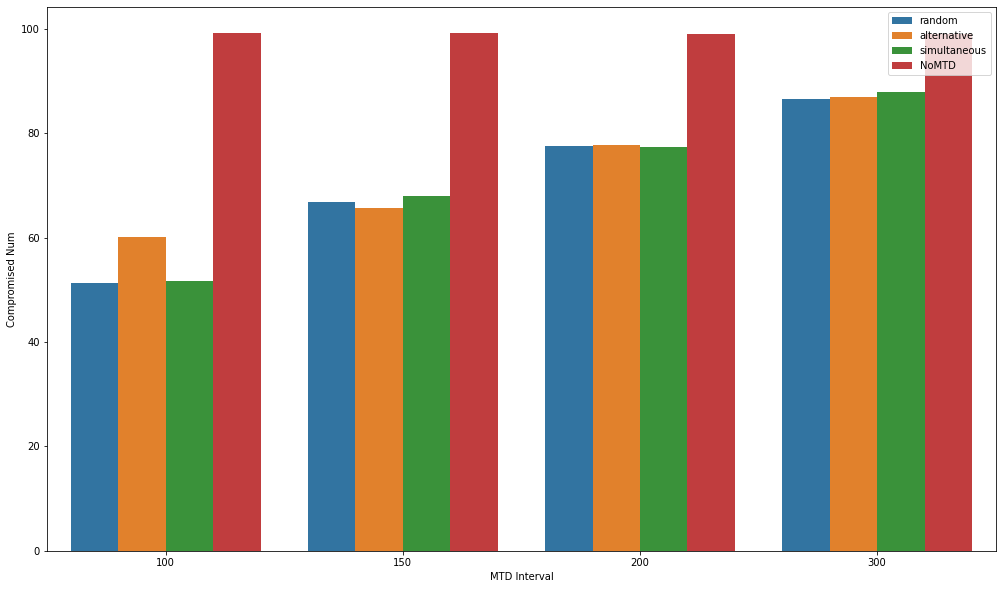

In [20]:
# plt.figure(figsize=(17, 10))
# sns.lineplot(data=multiple_results_avg, x='MTD Interval', y='Mean Time to Compromise', hue='Name', style='Name', markers=True, dashes=False)
# plt.show()
plt.figure(figsize=(17, 10))
sns.barplot(data=multiple_results_avg, x='MTD Interval', y='Compromised Num', hue='Name')
plt.legend(loc='upper right')
savefig('experimental_data/multiple_mtd_sim_cn.jpg')
plt.show()

## Attack Success Rate at 10000s simulation time

Saving figure to file experimental_data/multiple_mtd_sim_asr.jpg


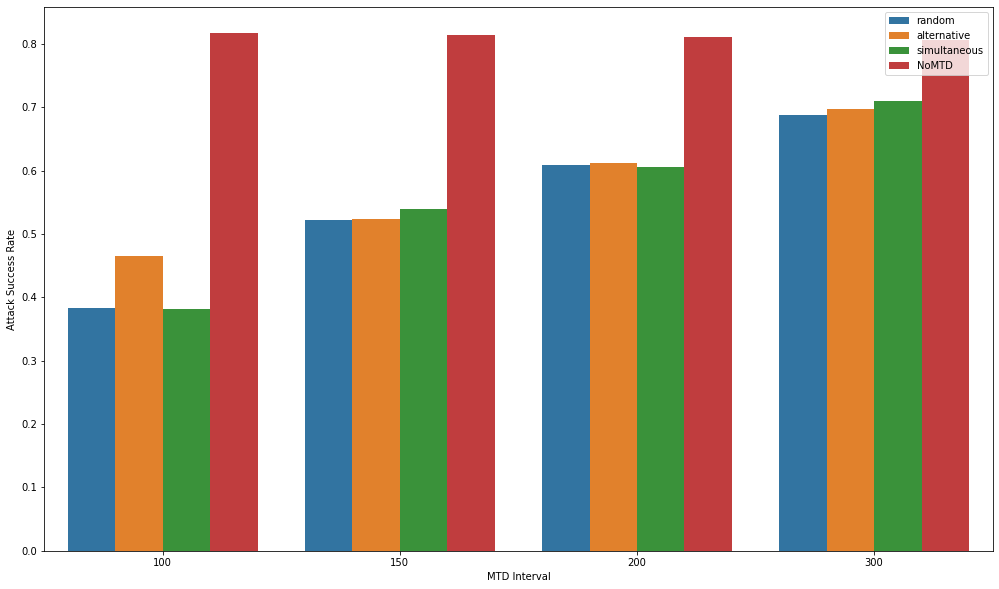

In [21]:
plt.figure(figsize=(17, 10))
sns.barplot(data=multiple_results_avg, x='MTD Interval', y='Attack Success Rate', hue='Name')
plt.legend(loc='upper right')
savefig('experimental_data/multiple_mtd_sim_asr.jpg')
plt.show()